1.Display following image operation in MATLAB/Python - i) Histogram image ii) Low pass filter mage iii) High pass image.
2 Write a MATLAB/Python program to read ‘rice.tif’ image, count number of rice and display area (also specific range)
3 Write a MATLAB/Python program to read an image and perform convolution with 3X3 mask
4 Write a MATLAB/Python program to read an image and perform Lapliciant filter mask.
5 Write a MATLAB/Python program to identify horizontal, vertical lines from an image
6 Write a MATLAB/Python program to Character Segment of an image.
7 For the given image perform edge detection using different operators and compare the results.
8 Write a MATLAB/Python program to read coins.png, leveling all coins and display area of all coins.
9 Display following image operation in MATLAB/Python - i) Threshold image ii) Power enhance contract image iii) High pass image.
10 Perform image enhancement, smoothing and sharpening, in spatial domain using different spatial filters and compare the performances

11 Write a MATLAB/Python program to separation of voiced/un-voiced/silence regions from a speech signal.
12 Write a MATLAB/Python program and plot multilevel speech resolution.
13 Write a MATLAB/Python program to recognize speech signal.
14 Write a MATLAB/Python program for text-to-speech conversion and record speech signal.


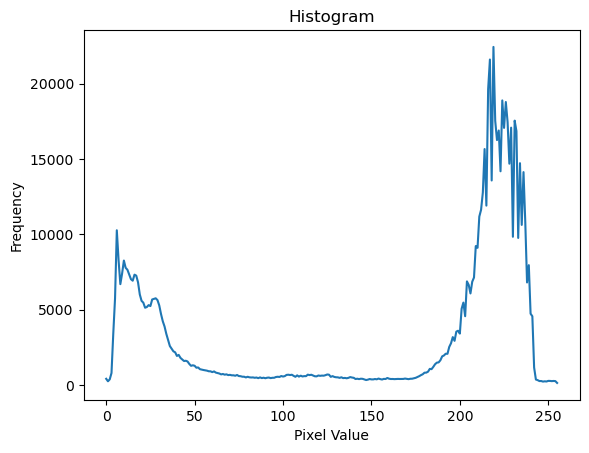

In [3]:
##histogram
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'flower1.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot the histogram
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [4]:
import cv2
import numpy as np

# Load the image
image_path = 'flower1.jpg'
image = cv2.imread(image_path)

# Apply Gaussian blur (low pass filter)
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Display the original and blurred images
cv2.imshow('Original Image', image)
cv2.imshow('Blurred Image', blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
import cv2
import numpy as np

# Load the image
image_path = 'flower1.jpg'
image = cv2.imread(image_path)

# Create a kernel for high pass filtering
kernel = np.array([[-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]])

# Apply the kernel to perform high pass filtering (sharpening)
high_pass_image = cv2.filter2D(image, -1, kernel)

# Display the original and high pass images
cv2.imshow('Original Image', image)
cv2.imshow('High Pass Image', high_pass_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
###2Write a Python program to read ‘rice.tif’ image, count number of rice and display area (also specific range), major axis length, and perimeter.


In [25]:
import cv2
import numpy as np

# Load the rice.tif image
image_path = 'rice1.tiff'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Threshold the image to create a binary mask
_, thresholded = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize counters for rice properties
rice_count = 0
total_area = 0
total_major_axis_length = 0
total_perimeter = 0

# Loop through each contour and calculate properties
for contour in contours:
    # Calculate area and perimeter
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    
    # Skip small contours
    if area < 100:
        continue
    
    # Calculate major axis length using fitting an ellipse
    if len(contour) >= 5:
        ellipse = cv2.fitEllipse(contour)
        major_axis_length = max(ellipse[1])
    else:
        major_axis_length = 0
    
    # Accumulate properties
    rice_count += 1
    total_area += area
    total_major_axis_length += major_axis_length
    total_perimeter += perimeter

    # Draw contours on the original image
    cv2.drawContours(image, [contour], 0, (0, 255, 0), 2)

# Display the image with contours
cv2.imshow('Rice Grains with Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Print the results
print(f"Number of rice grains: {rice_count}")
print(f"Total area of rice grains: {total_area:.2f} pixels")
print(f"Average major axis length: {total_major_axis_length / rice_count:.2f} pixels")
print(f"Total perimeter of rice grains: {total_perimeter:.2f} pixels")

Number of rice grains: 36
Total area of rice grains: 635093.50 pixels
Average major axis length: 129.43 pixels
Total perimeter of rice grains: 22514.12 pixels


In [ ]:
# 3 Write a MATLAB/Python program to read an image and perform convolution with 3X3 mask

In [6]:
import cv2
import numpy as np

# Load the image
image_path = 'flower1.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define a 3x3 convolution mask
mask = np.array([[1, 0, -1],
                 [2, 0, -2],
                 [1, 0, -1]])

# Perform convolution using OpenCV's filter2D function
convolved_image = cv2.filter2D(image, cv2.CV_64F, mask)

# Display the original and convolved images
cv2.imshow('Original Image', image)
cv2.imshow('Convolved Image', convolved_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
#4. Write a MATLAB/Python program to read an image and perform Lapliciant filter mask

In [7]:
import cv2
import numpy as np

# Load the image
image_path = 'flower1.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply the Laplacian filter using OpenCV's Laplacian function
laplacian_filtered = cv2.Laplacian(image, cv2.CV_64F)

# Display the original and Laplacian-filtered images
cv2.imshow('Original Image', image)
cv2.imshow('Laplacian Filtered Image', laplacian_filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
### 5 Write a MATLAB/Python program to identify horizontal, vertical lines from an image

In [11]:
import cv2
import numpy as np

# Load the image
image_path = 'lineCode.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply edge detection
edges = cv2.Canny(image, 50, 150)

# Apply Hough Line Transform for horizontal lines
horizontal_lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=5)

# Draw the detected horizontal lines on a copy of the original image
image_with_horizontal_lines = image.copy()
for line in horizontal_lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image_with_horizontal_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Apply Hough Line Transform for vertical lines
vertical_lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=5)

# Draw the detected vertical lines on a copy of the original image
image_with_vertical_lines = image.copy()
for line in vertical_lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image_with_vertical_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the original image and images with detected lines
cv2.imshow('Original Image', image)
cv2.imshow('Image with Horizontal Lines', image_with_horizontal_lines)
cv2.imshow('Image with Vertical Lines', image_with_vertical_lines)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# 6

In [12]:
import cv2

# Load the image
image_path = 'character.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around the segmented regions and count their lengths
segmented_image = image.copy()
total_length = 0

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(segmented_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    # Calculate the length of the contour (perimeter)
    length = cv2.arcLength(contour, closed=True)
    total_length += length

    # Display the length on the segmented image
    cv2.putText(segmented_image, f'Length: {length:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the original and segmented images
cv2.imshow('Original Image', image)
cv2.imshow('Segmented Image with Lengths', segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Print the total number of segmented regions and their total length
print(f"Number of segmented regions: {len(contours)}")
print(f"Total length of segmented regions: {total_length:.2f}")



Number of segmented regions: 1
Total length of segmented regions: 1035.01


In [ ]:
#6 

In [13]:
import cv2

# Load the image
image_path = 'Screenshot_5.tiff'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply thresholding to create a binary image
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Display each character and save them
for idx, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    
    # Skip small noise regions
    if w < 10 or h < 10:
        continue
    
    character = image[y:y+h, x:x+w]
    character_path = f'character_{idx}.png'
    cv2.imwrite(character_path, character)

    # Display the character
    cv2.imshow(f'Character {idx}', character)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

print(f"Segmented and displayed {len(contours)} characters.")


Segmented and displayed 43 characters.


In [ ]:
##7.	For the given image perform edge detection using different operators and compare the results.

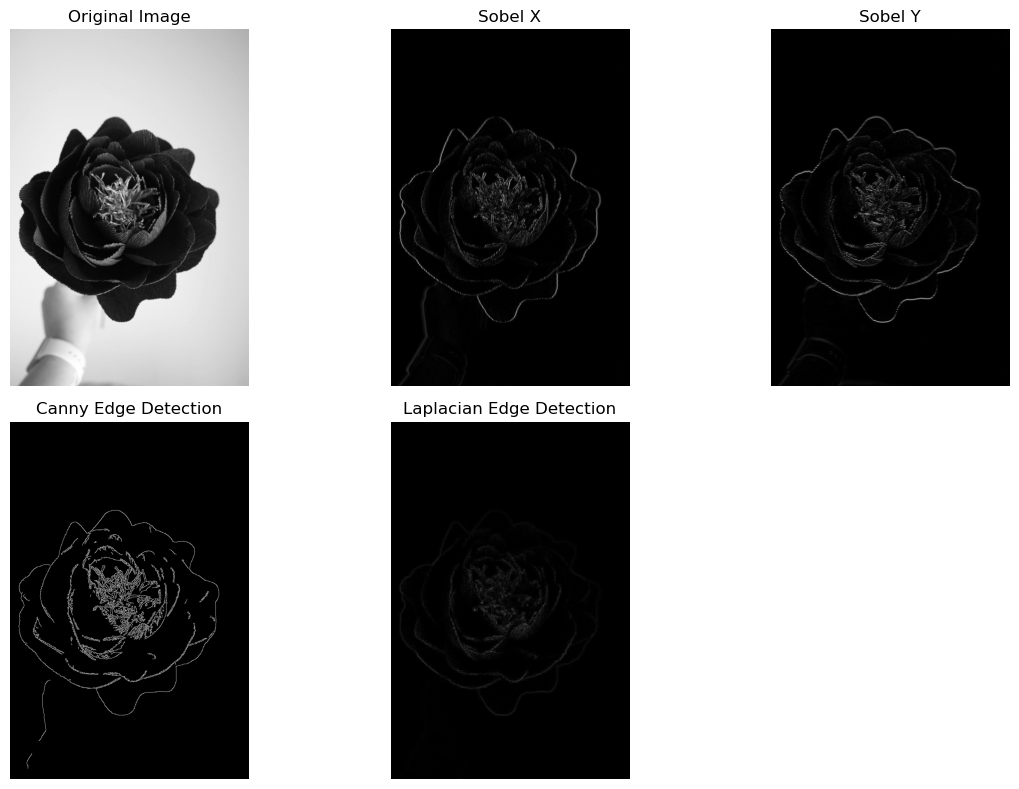

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = 'flower1.jpg'  # Replace with your image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply different edge detection operators
edges_sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
edges_sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
edges_canny = cv2.Canny(img, 100, 200)
edges_laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Plotting the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(np.abs(edges_sobel_x), cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(np.abs(edges_sobel_y), cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(edges_canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(np.abs(edges_laplacian), cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


8 . Write a MATLAB/Python program to read coins.png, leveling all coins and display area of all coins

In [15]:
import cv2
import numpy as np

# Load the image
image_path = 'coins-contour.tiff'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise and enhance edge detection
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Perform Canny edge detection
edges = cv2.Canny(blurred, 30, 150)

# Find contours in the edged image
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize a counter for coins and display their areas
coin_count = 0

for contour in contours:
    # Calculate the area of each contour
    area = cv2.contourArea(contour)
    
    # Filter out small noise regions
    if area < 100:
        continue
    
    # Draw the contour on the original image
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
    
    coin_count += 1
    print(f"Coin {coin_count}: Area = {area:.2f} pixels")

# Display the number of coins and the image with contours
print(f"Number of coins: {coin_count}")

# Display the image with contours
cv2.imshow('Coins with Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()



Coin 1: Area = 12781.50 pixels
Coin 2: Area = 13895.00 pixels
Coin 3: Area = 20419.50 pixels
Coin 4: Area = 13412.50 pixels
Coin 5: Area = 267.00 pixels
Coin 6: Area = 113.50 pixels
Coin 7: Area = 14931.50 pixels
Coin 8: Area = 161.50 pixels
Coin 9: Area = 13638.50 pixels
Number of coins: 9


In [ ]:
##9.	Display following image operation in MATLAB/Python - i) Threshold image ii) Power enhance contract image iii) High pass image.


In [16]:
import cv2
import numpy as np

# Load the image
image_path = 'flower1.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# i) Threshold image
_, thresholded_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# ii) Power enhance contrast image
gamma = 1.5
power_enhanced_image = np.power(image / 255.0, gamma)
power_enhanced_image = np.uint8(power_enhanced_image * 255)

# iii) High-pass image using Laplacian filter
laplacian_image = cv2.Laplacian(image, cv2.CV_64F)
high_pass_image = cv2.convertScaleAbs(laplacian_image)

# Display the original and processed images
cv2.imshow('Original Image', image)   
cv2.imshow('Thresholded Image', thresholded_image)
cv2.imshow('Power-Enhanced Image', power_enhanced_image)
cv2.imshow('High-Pass Image', high_pass_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
##10.	Perform image enhancement, smoothing and sharpening, in frequency domain using different filters and compare the performances 


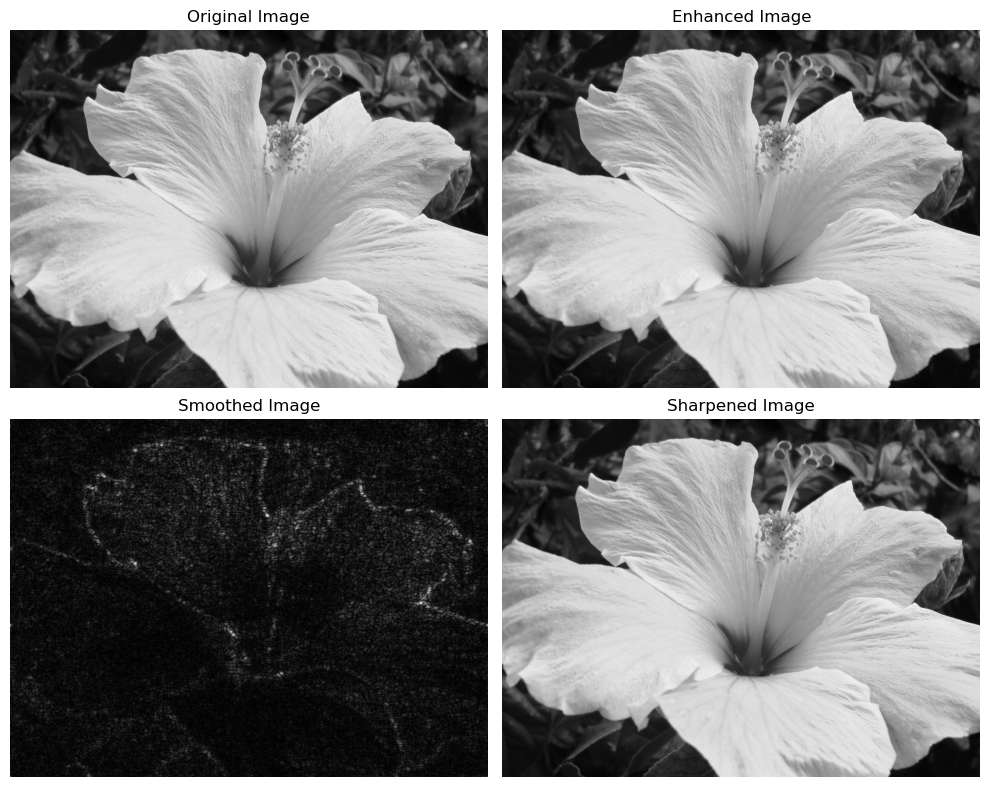

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2

# Load the image
image_path = 'flower.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform Fourier Transform
f_transform = fftshift(fft2(image))

# Define frequency domain filters
identity_filter = np.ones_like(f_transform)
low_pass_filter = np.zeros_like(f_transform)
low_pass_filter[200:400, 200:400] = 1
high_pass_filter = 1 - low_pass_filter

# Apply filters in frequency domain
enhanced_f_transform = f_transform * identity_filter
smoothed_f_transform = f_transform * low_pass_filter
sharpened_f_transform = f_transform * high_pass_filter

# Perform Inverse Fourier Transform
enhanced_image = np.abs(ifft2(ifftshift(enhanced_f_transform)))
smoothed_image = np.abs(ifft2(ifftshift(smoothed_f_transform)))
sharpened_image = np.abs(ifft2(ifftshift(sharpened_f_transform)))

# Plot original and processed images
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
!pip install librosa

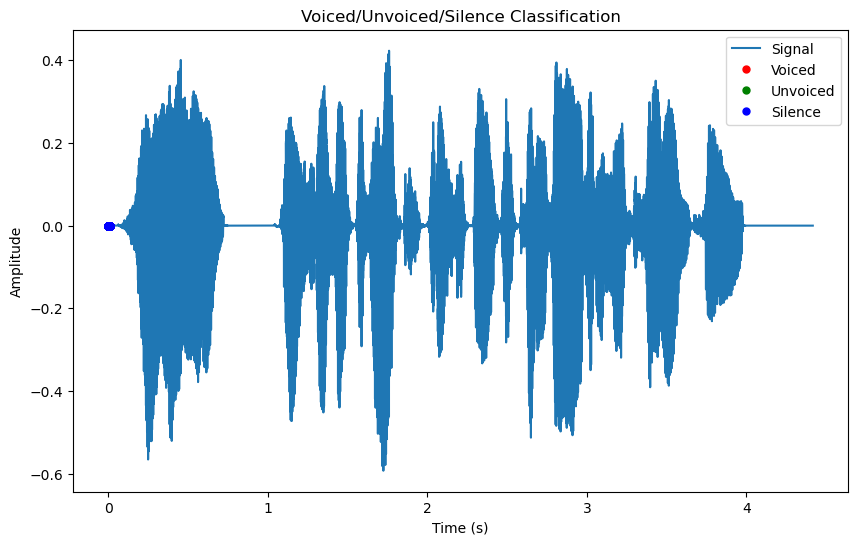

In [90]:
#11 no
import librosa
import numpy as np
import matplotlib.pyplot as plt

def classify_audio_segments(signal, sr):
    # Calculate the Short-Time Fourier Transform (STFT)
    stft = np.abs(librosa.stft(signal))
    
    # Calculate energy for each time frame
    energy = np.sum(stft, axis=0)
    
    # Calculate pitch using the YIN algorithm
    pitches, _ = librosa.piptrack(y=signal, sr=sr)
    pitch = np.median(pitches, axis=0)
    
    # Set energy and pitch thresholds
    energy_threshold = np.percentile(energy, 80)  # Adjust as needed
    pitch_threshold = .07  # Adjust as needed
    
    # Classify segments based on thresholds
    voiced_segments = np.where((energy > energy_threshold) & (pitch > pitch_threshold))[0]
    unvoiced_segments = np.where((energy > energy_threshold) & (pitch <= pitch_threshold))[0]
    silence_segments = np.where(energy <= energy_threshold)[0]
    
    return voiced_segments, unvoiced_segments, silence_segments

# Load an audio file
file_path = 'output1.wav'
signal, sr = librosa.load(file_path, sr=None)

# Classify audio segments
voiced_segments, unvoiced_segments, silence_segments = classify_audio_segments(signal, sr)

# Visualize the classification
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(signal)) / sr, signal, label='Signal')
plt.plot(voiced_segments / sr, signal[voiced_segments], 'ro', markersize=5, label='Voiced')
plt.plot(unvoiced_segments / sr, signal[unvoiced_segments], 'go', markersize=5, label='Unvoiced')
plt.plot(silence_segments / sr, signal[silence_segments], 'bo', markersize=5, label='Silence')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Voiced/Unvoiced/Silence Classification')
plt.show()


C:\Users\shoai\AppData\Local\Temp\ipykernel_9940\2675439293.py:11: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(signal), ref=np.max)


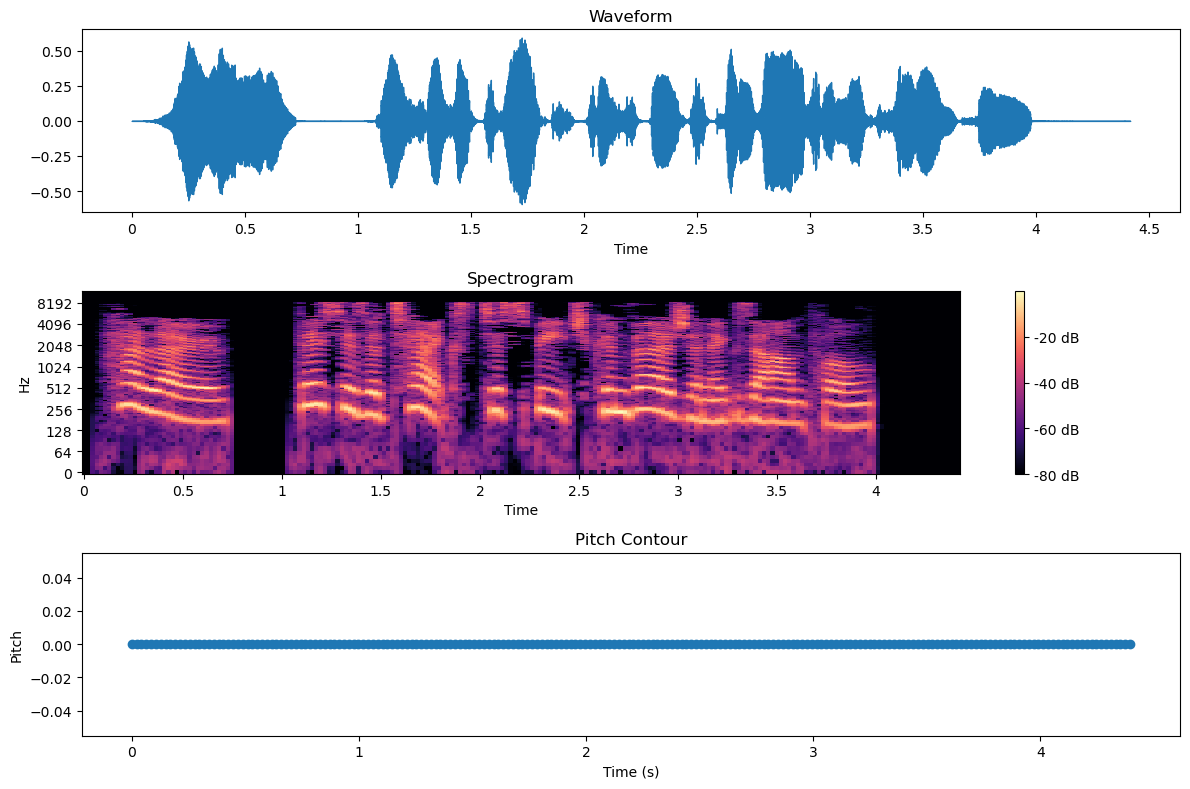

In [86]:
#12 Write a MATLAB/Python program and plot multilevel speech resolution. 
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an audio file
file_path = 'output1.wav'
signal, sr = librosa.load(file_path, sr=None)

# Calculate the Short-Time Fourier Transform (STFT)
D = librosa.amplitude_to_db(librosa.stft(signal), ref=np.max)

# Calculate pitch using the YIN algorithm
pitches, magnitudes = librosa.piptrack(y=signal, sr=sr)
pitch = np.median(pitches, axis=0)

# Plot the multilevel speech resolution
plt.figure(figsize=(12, 8))

# Plot the waveform
plt.subplot(3, 1, 1)
librosa.display.waveshow(signal, sr=sr)
plt.title('Waveform')

# Plot the spectrogram
plt.subplot(3, 1, 2)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

# Plot the pitch contour
plt.subplot(3, 1, 3)
plt.plot(np.arange(len(pitch)) * librosa.get_duration(y=signal, sr=sr) / len(pitch), pitch, 'o-')
plt.xlabel('Time (s)')
plt.ylabel('Pitch')
plt.title('Pitch Contour')

plt.tight_layout()
plt.show()

In [ ]:
!pip install SpeechRecognition

In [84]:
#13
import speech_recognition as sr

# Initialize the recognizer
recognizer = sr.Recognizer()

# Load an audio file
file_path = 'output1.wav'

# Read the audio file using the recognizer
with sr.AudioFile(file_path) as source:
    audio = recognizer.record(source)

# Recognize speech using Google Web Speech API
try:
    recognized_text = recognizer.recognize_google(audio)
    print("Recognized text: ", recognized_text)
except sr.UnknownValueError:
    print("Speech recognition could not understand audio")
except sr.RequestError as e:
    print(f"Could not request results from Google Web Speech API; {e}")

Recognized text:  hello this is a text to speech conversion example


In [ ]:
!pip install sounddevice

In [ ]:
!pip install gtts sounddevice

In [74]:
!pip install sounddevice

In [80]:
#14 no
from gtts import gTTS
import sounddevice as sd
import soundfile as sf
import os

# Text to be converted to speech
text = "Hello, this is a text-to-speech conversion example."

# Perform text-to-speech conversion
textToSpeech = gTTS(text)
textToSpeech.save("output.wav")

# Load the generated speech
audio_data, sample_rate = sf.read("output.wav", dtype='float32')

# Play the generated speech
sd.play(audio_data, sample_rate)
sd.wait()  # Wait until the playback is finished

# Clean up by removing the generated file
os.remove("output.wav")
